In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

AttributeError: module 'matplotlib.rcsetup' has no attribute '_validators'

In [100]:
import benford as bf
import scipy.stats as st
import csv

In [101]:
conf=95
file="C:\\Users\\Forex1\\Desktop\\FullStack\\census_2009b"

In [102]:
sniffer = csv.Sniffer()
sample_bytes = 320
dialect = sniffer.sniff(
    open(file).read(sample_bytes))



In [103]:

data = pd.read_csv(file, delimiter=dialect.delimiter)
data.head()

,State,Town,7_2009,3,4,8.40188
0,Alabama,Abbeville,2930,3.0,10.0,3.94383
1,Alabama,Adamsville,4782,3.0,11.0,7.83099
2,Alabama,Addison,709,3.0,8.0,7.98440
3,Alabama,Akron,433,3.0,6.0,9.11647
4,Alabama,Alabaster,29861,3.0,10.0,1.97551



Initialized sequence with 19507 registries.
First_1_Dig
1    0.293997
2    0.181678
3    0.120008
4    0.094684
5    0.079920
6    0.070231
7    0.059773
8    0.053417
9    0.046291
Name: Found, dtype: float64

Test performed on 19507 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
2            0.176091  0.181678  2.039282


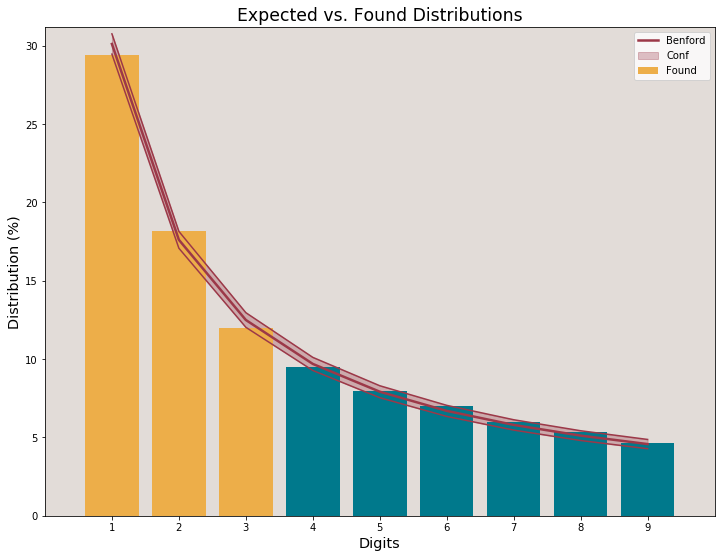

In [104]:
f1d = bf.first_digits(data['7_2009'],digs=1,confidence=conf) # digs=1 for the first digit (1-9)

In [120]:
f1d_sorted=f1d.sort_index()
f1d_sorted['color']=f1d_sorted['Z_score'].apply(lambda x: 'green' if x>1.65 else 'red')
f1d_sorted

,Counts,Found,Expected,Z_score,percent,color
First_1_Dig,,,,,,
1,5735,0.293997,0.301030,2.133605,-2.336302,green
2,3544,0.181678,0.176091,2.039282,3.172851,green
3,2341,0.120008,0.124939,2.071848,-3.946362,green
4,1847,0.094684,0.096910,1.038846,-2.297031,red
5,1559,0.079920,0.079181,0.368874,0.933027,red
6,1370,0.070231,0.066947,1.821092,4.906000,green
7,1166,0.059773,0.057992,1.049223,3.071923,red
8,1042,0.053417,0.051153,1.419168,4.426370,red
9,903,0.046291,0.045757,0.339514,1.166114,red


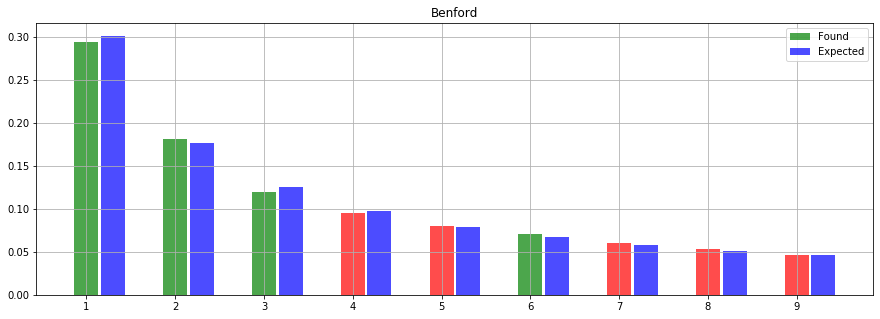

In [121]:

f1d['percent']=100*(f1d['Found']-f1d['Expected'])/f1d['Expected']
width=0.3
ind = np.arange(1,10)
plt.figure(figsize=(15,5))
color=['orange ']
plt.xticks(ind)
plt.bar(ind,f1d_sorted['Found'],width=width*0.9,label='Found',color=f1d_sorted['color'],alpha=0.7)
plt.bar(ind+width,f1d_sorted['Expected'],width=width*0.9,label='Expected',color='blue',alpha=0.7)
plt.title('Benford')
plt.legend()
plt.grid()
plt.savefig('a.png')

In [36]:
f1d['p-value']=f1d['Z_score'].apply(lambda z: True if z>st.norm.ppf(conf/100) else False)

In [37]:

st.norm.ppf(.80)

0.8416212335729143

In [38]:
f1d

,Counts,Found,Expected,Z_score,percent,p-value
First_1_Dig,,,,,,
1,5735,0.293997,0.301030,2.133605,-2.336302,True
3,2341,0.120008,0.124939,2.071848,-3.946362,True
2,3544,0.181678,0.176091,2.039282,3.172851,True
6,1370,0.070231,0.066947,1.821092,4.906000,True
8,1042,0.053417,0.051153,1.419168,4.426370,False
7,1166,0.059773,0.057992,1.049223,3.071923,False
4,1847,0.094684,0.096910,1.038846,-2.297031,False
5,1559,0.079920,0.079181,0.368874,0.933027,False
9,903,0.046291,0.045757,0.339514,1.166114,False


In [80]:
f3d = bf.first_digits(data['7_2009'], digs=3,save_fig='aa')

TypeError: first_digits() got an unexpected keyword argument 'save_fig'


Initialized sequence with 19507 registries.
First_1_Dig
1    0.293997
2    0.181678
3    0.120008
4    0.094684
5    0.079920
6    0.070231
7    0.059773
8    0.053417
9    0.046291
Name: Found, dtype: float64

Test performed on 19507 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant deviations are:

             Expected     Found   Z_score
First_1_Dig                              
1            0.301030  0.293997  2.133605
3            0.124939  0.120008  2.071848
2            0.176091  0.181678  2.039282


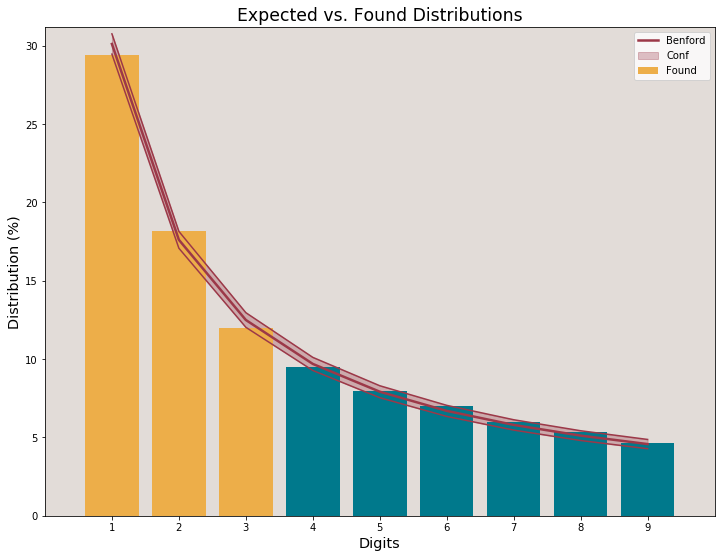

In [40]:
f1d = bf.first_digits(data['7_2009'],digs=1,confidence=conf,high_Z='all')


Initialized sequence with 19507 registries.
First_1_Dig
1    0.293997
2    0.181678
3    0.120008
4    0.094684
5    0.079920
6    0.070231
7    0.059773
8    0.053417
9    0.046291
Name: Found, dtype: float64

Test performed on 19507 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
2            0.176091  0.181678  2.039282
Mean Absolute Deviation: 0.003153
MAD <= 0.006000: Close conformity.


The Chi-square statistic is 17.8779.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.0086.
Critical K-S for this series: 0.0097


C:\Users\Forex1\Anaconda3\lib\site-packages\benford\benford.py:652: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  verbose=self.verbose)
C:\Users\Forex1\Anaconda3\lib\site-packages\benford\benford.py:656: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  verbose=self.verbose)


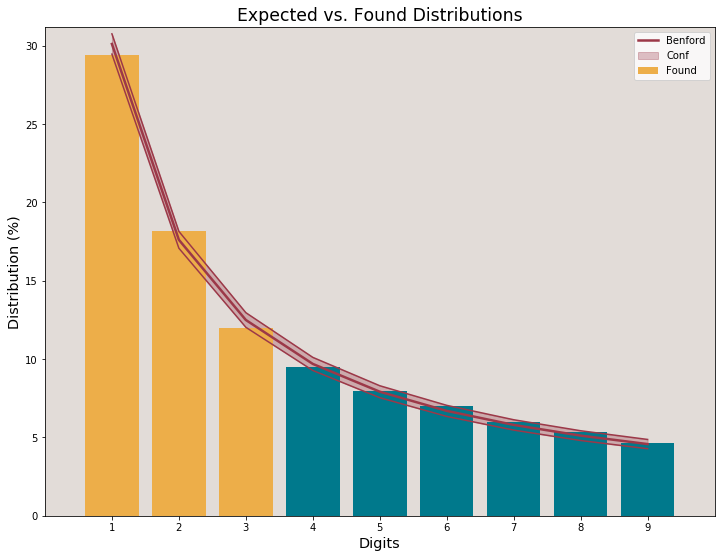

In [41]:

sd = bf.first_digits(data['7_2009'],digs=1,  MAD=True, confidence=conf,
                     chi_square=True, KS=True)

In [49]:
benf.F1D.report(show_plot=False)


 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.003153
MAD <= 0.006000: Close conformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.008602 
	Critical value: 0.009737 -- PASS

	Chi square: 17.877922 
	Critical value: 15.507000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
2            0.176091  0.181678  2.039282


In [45]:
import csv
sniffer = csv.Sniffer()
sample_bytes = 320
dialect = sniffer.sniff(
    open("C:\\Users\\Forex1\\Desktop\\FullStack\\census_2009b").read(sample_bytes))

dialect.delimiter

'\t'

In [83]:
plot=True
benf.F1D.save_fig('a')

AttributeError: 'Test' object has no attribute 'save_fig'

In [18]:
a